# EDA - Exploratory Data Analysis of Used Mercedes Cars

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
data = pd.read_csv('data_cleaned.csv')

In [3]:
data.shape

(11975, 33)

In [4]:
data.describe()

,Unnamed: 0,price,milage,hubraum,age,power_ps,power_kw,amg,mc_laren,blk_series,...,avantgarde,elegance,tag_63,tag_65,tag_55,tüv,E10,biodiesel,pflanzenöl,electric
count,11975.000000,11975.000000,11975.000000,11974.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.0,11975.000000,...,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000
mean,6024.099040,40408.145052,93638.727349,2562.195831,5.143166,247.088763,181.771888,0.417787,0.0,0.000501,...,0.102965,0.015198,0.077996,0.003674,0.002171,0.030230,0.076075,0.001336,0.000418,0.061378
std,3480.458919,34249.862902,96666.385779,929.661095,6.115793,132.328925,97.320970,0.493215,0.0,0.022379,...,0.303925,0.122346,0.268176,0.060507,0.046547,0.171226,0.265129,0.036530,0.020430,0.240032
min,0.000000,350.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3010.500000,9999.000000,13594.000000,1950.000000,0.083333,160.000000,118.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6020.000000,32900.000000,57560.000000,2148.000000,2.833333,194.000000,143.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9035.500000,63232.000000,154089.500000,2987.000000,9.416667,299.000000,220.000000,1.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12071.000000,145000.000000,800000.000000,7180.000000,29.916667,850.000000,625.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11975 entries, 0 to 11974
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      11975 non-null  int64  
 1   carname         11975 non-null  object 
 2   price           11975 non-null  float64
 3   milage          11975 non-null  float64
 4   hubraum         11974 non-null  float64
 5   transmission    11975 non-null  object 
 6   num_seats       11975 non-null  object 
 7   num_doors       11975 non-null  object 
 8   emission_class  11975 non-null  object 
 9   car_type        11975 non-null  object 
 10  num_owners      11975 non-null  object 
 11  age             11975 non-null  float64
 12  power_ps        11975 non-null  float64
 13  power_kw        11975 non-null  float64
 14  Schaden         11975 non-null  object 
 15  Model           11975 non-null  object 
 16  amg             11975 non-null  int64  
 17  mc_laren        11975 non-null 

In [6]:
# check for columns that contain NaNs
nan_cols = [i for i in data.columns if data[i].isnull().any()]
print(nan_cols)

['hubraum']


- There are no NaNs in the Dataset!

In [7]:
data.head()

,Unnamed: 0,carname,price,milage,hubraum,transmission,num_seats,num_doors,emission_class,car_type,...,elegance,tag_63,tag_65,tag_55,tüv,E10,biodiesel,pflanzenöl,electric,fueltype
0,0,Mercedes-Benz Mercedes vaneo mit 2 jahre tüv t...,1900.0,278000.0,3564.923077,Schaltgetriebe,na,na,na,andere,...,0,0,0,0,1,0,0,0,0,Diesel
1,1,Mercedes-Benz Mercedes-Benz A 170 Autotronic A...,1500.0,390000.0,1662.038633,Automatik,na,na,na,limousine,...,0,0,0,0,0,0,0,0,0,Benzin
2,2,Mercedes-Benz Mercedes A140 Elegance Piccadilly,1700.0,130000.0,1662.038633,Schaltgetriebe,na,na,na,andere,...,1,0,0,0,0,0,0,0,0,Benzin
3,3,Mercedes-Benz Mercedes-benz A160,1550.0,154079.0,1662.038633,Automatik,na,na,na,kleinwagen,...,0,0,0,0,0,0,0,0,0,Benzin
4,4,Mercedes-Benz CLK Coupe 200 Elegance Automatik,1200.0,175000.0,1998.000000,Automatik,4,2/3,na,sport,...,1,0,0,0,0,0,0,0,0,Benzin


In [8]:
data.columns

Index(['Unnamed: 0', 'carname', 'price', 'milage', 'hubraum', 'transmission',
       'num_seats', 'num_doors', 'emission_class', 'car_type', 'num_owners',
       'age', 'power_ps', 'power_kw', 'Schaden', 'Model', 'amg', 'mc_laren',
       'blk_series', 'blue_eff', 'g_pow', 'brabus', 'avantgarde', 'elegance',
       'tag_63', 'tag_65', 'tag_55', 'tüv', 'E10', 'biodiesel', 'pflanzenöl',
       'electric', 'fueltype'],
      dtype='object')

## 1. Categorical features

In [9]:
def count_boxplot(key):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title(key +' Histogram')
    sns.countplot(data=data, y=key,  order = data[key].value_counts().index, palette=("magma"))
    plt.subplot(1,2,2)
    plt.title(key +' vs Price')
    sns.boxplot(y=data[key], x=data.price, order = data[key].value_counts().index, palette=("magma"))
    plt.show()

In [10]:
def countplot_save(key):
    a = plt.figure(figsize=(6,5))
    plt.title(key +' Histogram')
    sns.countplot(data=data, y=key,  order = data[key].value_counts().index, palette=("magma"))
    a.savefig('./Plots/'+key+'.png')

In [11]:
def countplot(key, dataframe=data):
    sns.countplot(y=key, data=data, order = data[key].value_counts().index)

In [12]:
counts = data.Model.value_counts()
print(counts)

C-Klasse     2075
E-Klasse     2003
A-Klasse     1000
S-Klasse      850
GLE           845
GLC           607
V-Klasse      604
OTHER         577
B-Klasse      543
CL            348
Vito          315
G-Klasse      293
Sprinter      275
CLA           272
M-Klasse      203
SL            190
GLA           189
GLS           136
GT            133
CLK           118
Vaneo          97
GLK            83
GLB            55
R-Klasse       53
MarcoPolo      46
GL             44
CLC            20
X-Klasse        1
Name: Model, dtype: int64


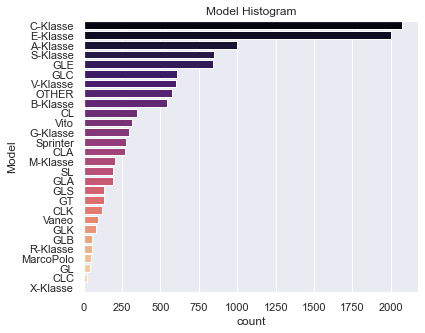

In [13]:
#count_boxplot('Model')
countplot_save('Model')

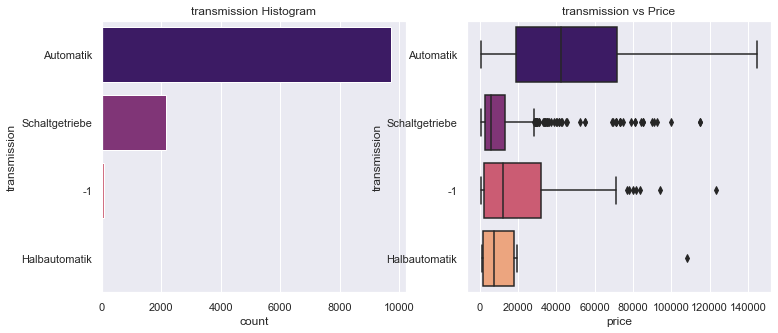

In [14]:
count_boxplot('transmission')

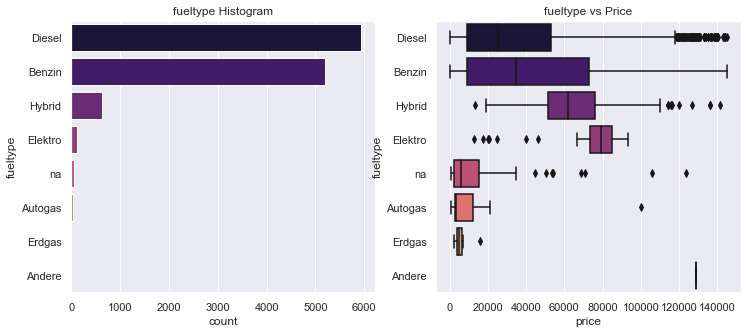

In [15]:
count_boxplot('fueltype')

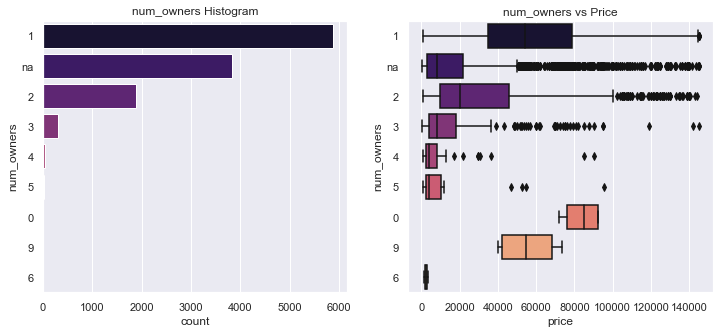

In [16]:
count_boxplot('num_owners')

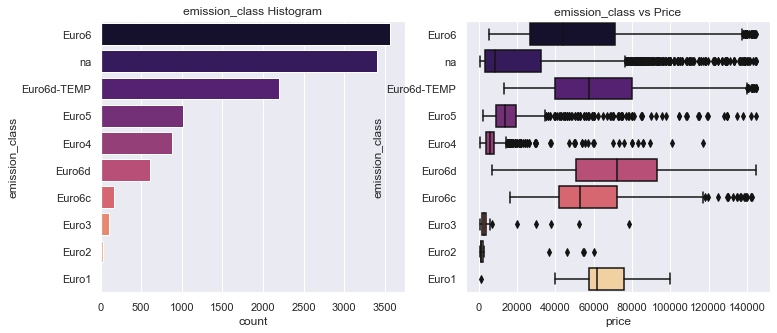

In [17]:
count_boxplot('emission_class')

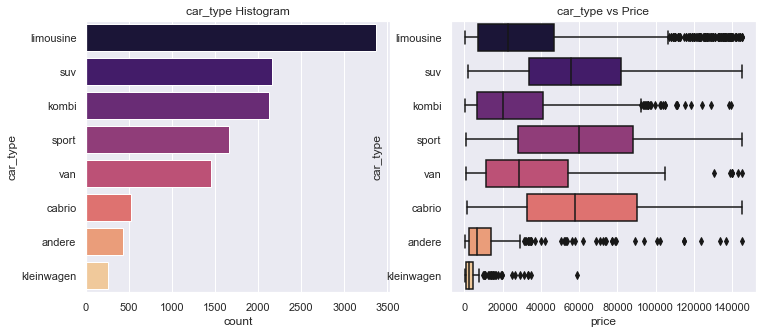

In [18]:
count_boxplot('car_type')

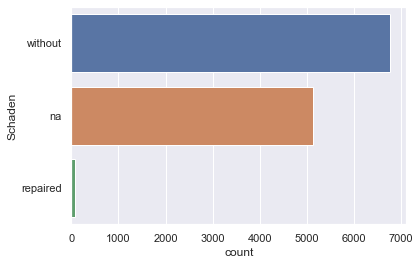

In [19]:
countplot('Schaden')

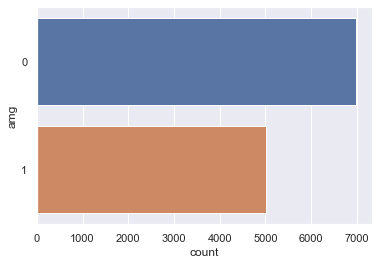

In [20]:
countplot('amg')

## 2. Numerical Data

### 2.1. Price

<AxesSubplot:xlabel='price', ylabel='Count'>

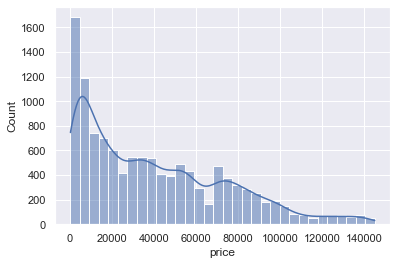

In [21]:
sns.histplot(data.price, kde=True)

In [22]:
data.price.mean()

40408.14505219206

### 2.2. Milage

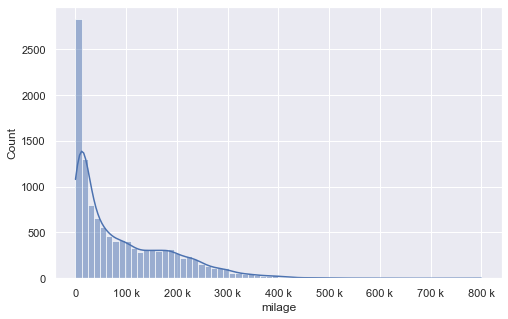

In [23]:
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.histplot(data.milage, kde=True)
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

### 2.3. Power

<AxesSubplot:xlabel='power_ps', ylabel='Count'>

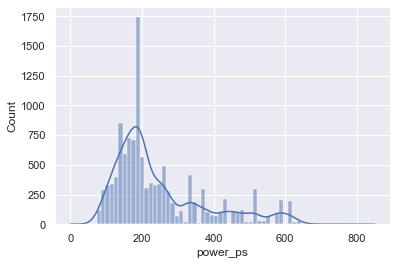

In [24]:
sns.histplot(data.power_ps, kde=True)

<AxesSubplot:xlabel='power_kw', ylabel='Count'>

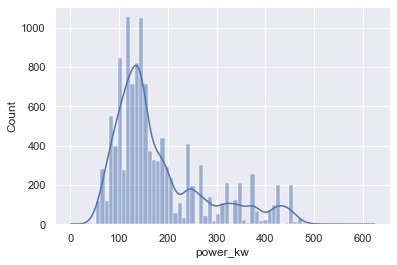

In [25]:
sns.histplot(data.power_kw, kde=True)

In [26]:
data.power_ps.mean()

247.08876336379646

In [27]:
data.power_kw.mean()

181.77188750846946

### 2.4. Age

<AxesSubplot:xlabel='age', ylabel='Count'>

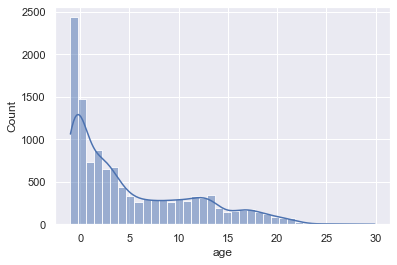

In [28]:
sns.histplot(data.age, kde=True)

In [29]:
print('mean age of cars:', data.age.mean(), '[years]')

mean age of cars: 5.143166318719555 [years]


### 2.5. Hubraum

<AxesSubplot:xlabel='hubraum', ylabel='Count'>

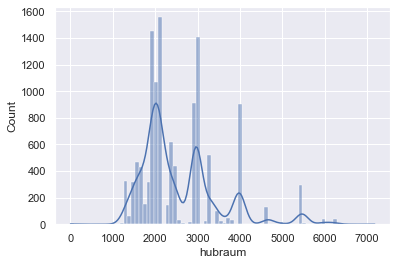

In [30]:
sns.histplot(data.hubraum, kde=True)

In [31]:
def scatter_plot(key, hue=None, size=7, savename=None):
    fig, ax = plt.subplots(figsize=(6, 5)) 
    sns.scatterplot(data=data, y='price', x=key, s=size, hue=hue, palette=("magma"))
    plt.title(key + ' vs. Price')
    plt.xlabel(key)
    plt.ylabel('Price')
    plt.tight_layout()
    ax.xaxis.set_major_formatter(ticker.EngFormatter())
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    plt.show()
    if savename is not None:
        fig.savefig('Plots/'+savename+'.png', format='png', dpi=300)
    

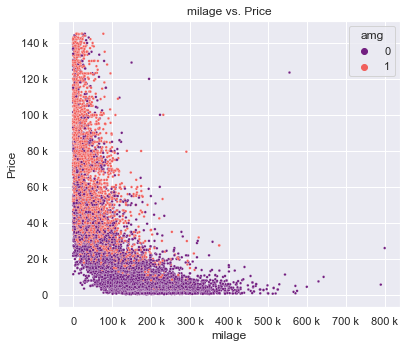

In [32]:
scatter_plot('milage', hue='amg', savename='price_milage2')

#### Inference
- "price" negatively correlates with "milage" --> price decreases exponentially over "milage"
- "price" seems to positively correlate with "AMG" tag

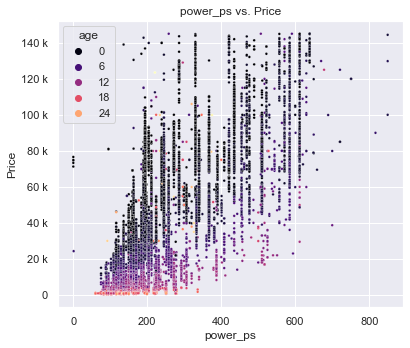

In [33]:
scatter_plot('power_ps', hue='age')

#### Inference

- "power_ps" correlates positively with "price"
- "age" is a indicator for price, too

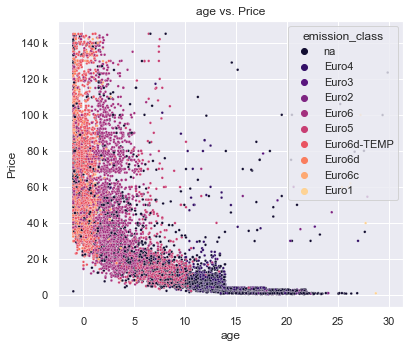

In [34]:
scatter_plot('age', hue='emission_class')

#### Inference

- You see how the emission classes groups the cars in different age stamps
- price decreases exponentially with age
- emission_class can be indicator for price, too